## 1. Introduction, Motivation and/or Problem Statement

## 2. Data Sources or RL Tasks

## 3. Exploratory Analysis of Data or RL Tasks

## 4. Models and/or Methods

### 4.1 Baseline Model Comparison
| Model | Accuracy | Macro F1 | ROC AUC(OvR) | Best Class | Worst Class |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| TF-IDF + Logistic Regression | 24.8% | 0.226 | 0.604 | false | pants-fire|
| LSTM + Random Embedding | 24% | 0.230 | 0.563 | false | pants-fire |
| BERT Network | 25.65% | 0.2389 | 0.6106 | false | true |

As is shown above, Bert network has the best performance among the three models. Consequently, we will use Bert network as our final baseline model.

### 4.2 Improvements on the Baseline Model
Using BERT as the baseline, we made the following improvements:

| Measurements | Origin Model | Improvement 1 | Improvement 2 | Improvement 3 | Improvement 4 |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| Accuracy | 25.65% | 33.15% | 34.41% | 36.07% | 37.33% |
| Macro F1 | 0.2389 | 0.2587 | 0.3178 | 0.3315 | 0.3311 |

- **Improvement 1: Dual-Branch BERT Architecture:**
Designed a two-branch BERT model that processes both the statement and metadata inputs independently through separate BERT encoders. Their outputs are concatenated and enhanced by integrating a credit-based feature vector before classification, allowing the model to incorporate contextual credibility information.
The credit-based feature vector, which is also called as credit score, indicates how often the speaker has told the truth in the past.
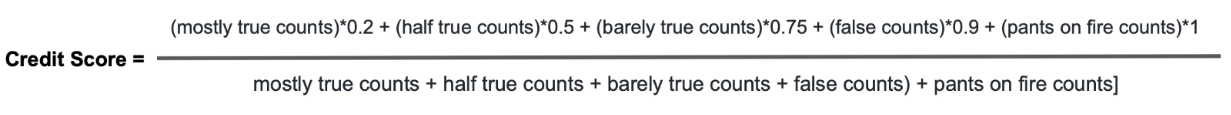
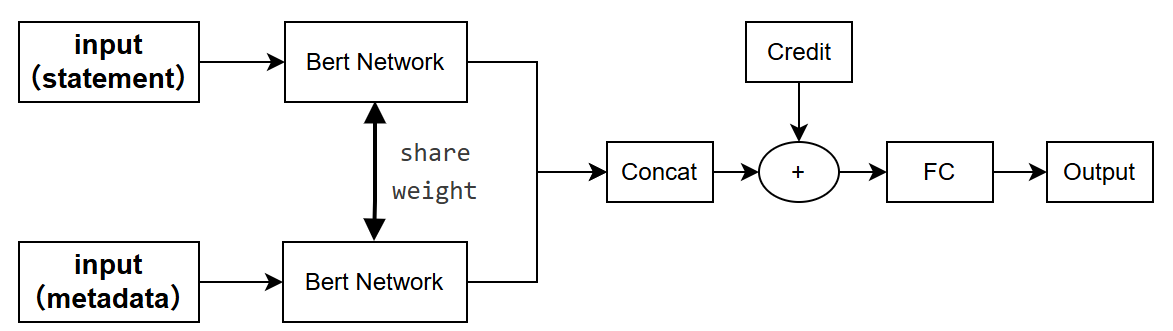

- **Improvement 2: Asymmetric Loss Function (ASL):**
Employed the Asymmetric Loss function, which effectively handles class imbalance especially for situations where the sample distribution is severely unbalanced.
ASL has different straties for Positive and Negative Samples:
- Hard positive samples are given higher weight to encourage learning.
- Easy negative samples are suppressed to prevent training bias.



- **Improvement 3: Virtual Adversarial Training (VAT):**<br>
Virtual Adversarial Training (VAT) is a technique used to improve the robustness of machine learning models by making them more resistant to small adversarial perturbations. Unlike traditional adversarial training, which involves generating adversarial examples based on true labels, VAT generates adversarial examples by perturbing the input data itself in a way that maximizes the model's prediction uncertainty. The goal is to make the model more invariant to small changes in the input, thus improving generalization.
In VAT, the process involves the following steps:
1. A small perturbation is applied to the input data, aiming to increase the model’s output variance.
2. This perturbation is chosen such that it does not significantly alter the input, but it maximizes the model's response in terms of the output space.
3. The model is then trained to minimize the discrepancy between its original predictions and its predictions on the perturbed input, helping it learn more robust representations.
By using VAT, the model becomes less sensitive to minor perturbations, enhancing its robustness and leading to improved performance on out-of-distribution or adversarially perturbed data.

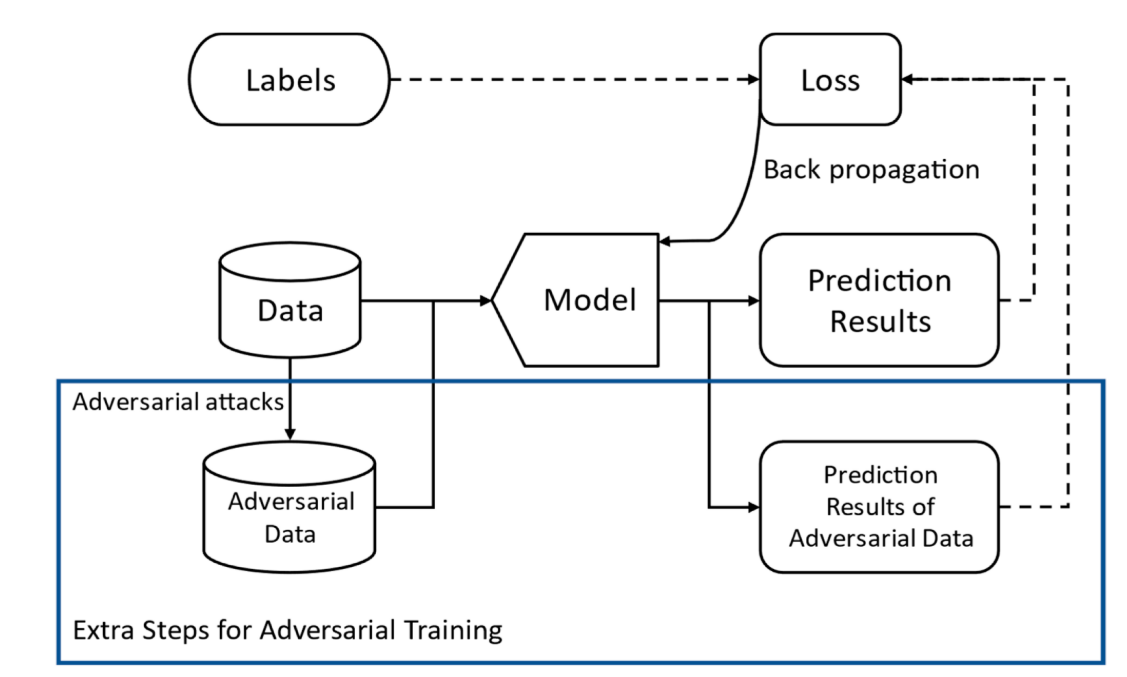

- **Improvement 4: Regularized Dropout (R-Drop):**<br>
Regularized Dropout (R-Drop) is a technique designed to improve the regularization of neural networks by adding a form of dropout regularization during training. Dropout itself is a method where a percentage of neurons are randomly “dropped” (i.e., set to zero) during each training step to prevent overfitting. R-Drop, however, introduces a novel approach by applying dropout to the hidden layers of the network and regularizing the model using a reconstruction loss.
The key idea of R-Drop is to:
1. Apply dropout to the hidden layers during training.
2. Train the network in such a way that it minimizes the difference between the network’s predictions under different dropout masks. This regularization helps the model to generalize better, as it learns to be less sensitive to the specific neurons that are dropped during training.
3. R-Drop minimizes the variation between the predictions of the model with different dropout masks, leading to more stable and robust predictions.
R-Drop enhances the performance of the model by ensuring that it does not rely too heavily on any specific subset of features, thus improving its ability to generalize to new, unseen data.
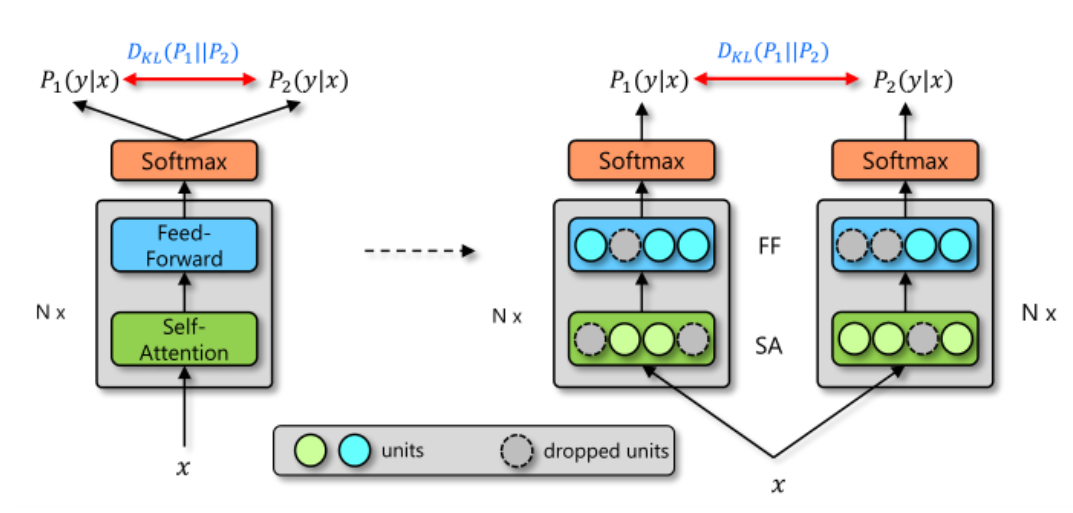

### 4.3 Final Model
**Model Structure:**
- Input: Text statement + metadata
- Embedding: word_embeddings，position_embeddings，token_type_embeddings
- encoder Layer: 12 layers
- Dropout: 0.1
- Loss: Asymmetric Loss
- Optimizer:AdamW(weight_decay=0.01)
- Scheduler: StepLR(step_size=3, gamma=0.1)
- Output: Dense(softmax for 6-way classification)
- Early Stop: If the validation accuracy does not increase for 3 epochs, stop training.
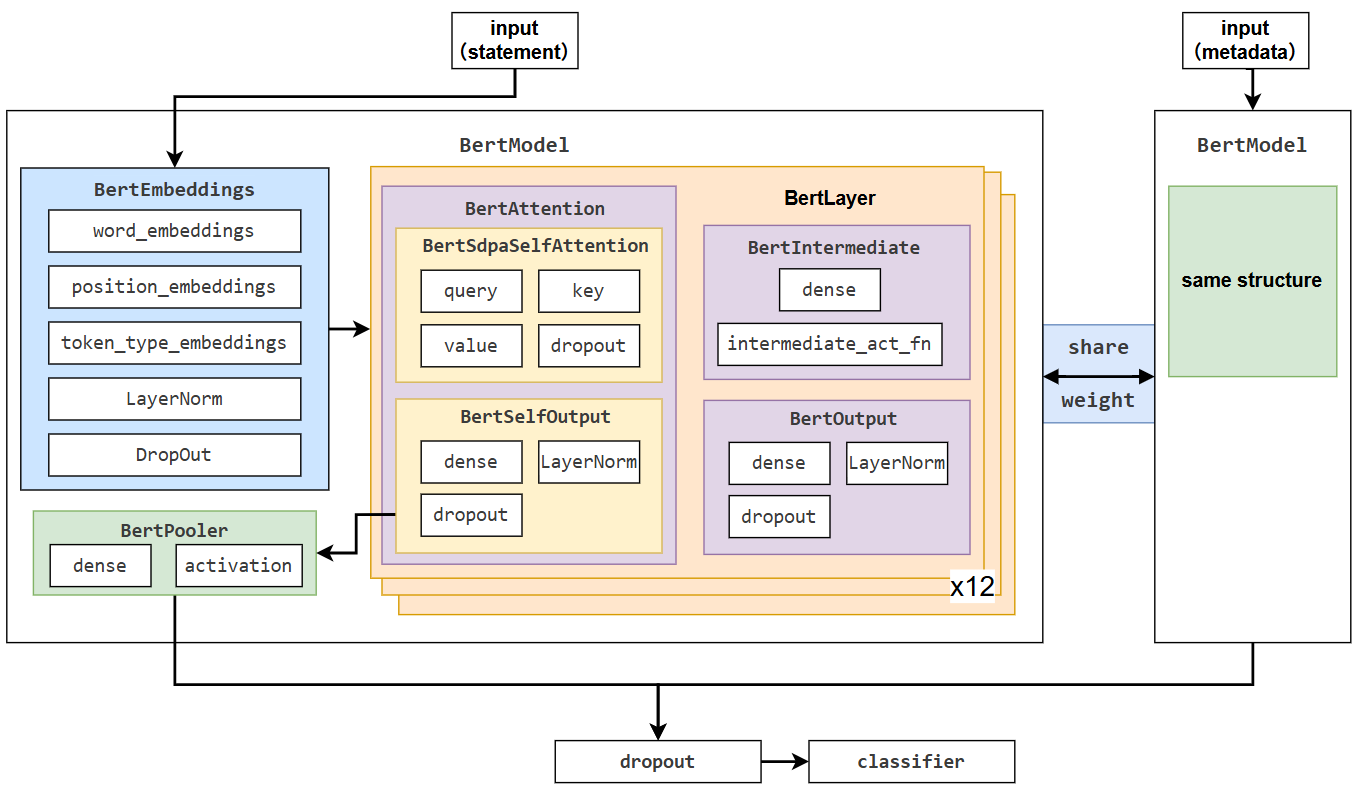


In [ ]:
!python bert_origin.py

cuda:0
starting
Epoch 1/100
----------
train total loss: 1.7727
train sentiment_acc: 0.2109

 Classification Report:
              precision    recall  f1-score   support

           0     0.1794    0.1205    0.1442      1676
           1     0.2128    0.2732    0.2392      1962
           2     0.2103    0.3198    0.2537      2114
           3     0.2069    0.1421    0.1685      1654
           4     0.2274    0.2546    0.2402      1995
           5     0.3000    0.0036    0.0071       839

    accuracy                         0.2109     10240
   macro avg     0.2228    0.1856    0.1755     10240
weighted avg     0.2158    0.2109    0.1964     10240


 Confusion Matrix:
[[202 443 520 154 357   0]
 [225 536 651 186 363   1]
 [224 509 676 239 465   1]
 [180 391 518 235 328   2]
 [219 451 600 214 508   3]
 [ 76 189 250 108 213   3]]
val total loss: 1.7263
val sentiment_acc: 0.2430

 Classification Report:
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:15

## 5. Results

In [11]:
!python bert_network_with_VAT_RDrop.py

cuda:0
{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f58241d9130>, 'val': <torch.utils.data.dataloader.DataLoader object at 0x7f582412fd70>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7f5823923c80>}
{'train': 10240, 'val': 1284, 'test': 1267}
starting
Epoch 1/100
----------
train total loss: 1.2699
train sentiment_acc: 0.2754

 Classification Report:
              precision    recall  f1-score   support

           0     0.2338    0.1014    0.1415      1676
           1     0.3389    0.3818    0.3591      1962
           2     0.2555    0.3543    0.2969      2114
           3     0.2060    0.1282    0.1580      1654
           4     0.2664    0.4100    0.3230      1995
           5     0.4469    0.1454    0.2194       839

    accuracy                         0.2754     10240
   macro avg     0.2913    0.2535    0.2497     10240
weighted avg     0.2778    0.2754    0.2597     10240


 Confusion Matrix:
[[170 443 557 123 370  13]
 [185 749 581  96 343  

## 6. Discussion

## 7. Writing